<a href="https://colab.research.google.com/github/AdityaKuranjekarMYCAPTAIN/PythonForAi/blob/main/ML_Algorithms(basics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Scipy: {}'.format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Scipy: 1.13.1
Scipy: 1.26.4
Matplotlib: 3.8.0
Pandas: 2.2.2
Sklearn: 1.6.0


In [1]:
import pandas
import matplotlib.pyplot as pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier


In [3]:
#loading data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepan-length','sepal-width','petal length','petal width','class']
dataset = read_csv(url, names=names)

In [4]:
#dimentions of the datasets
print(dataset.shape)

(150, 5)


In [5]:
#take peek at the data
print(dataset.head(20))

    sepan-length  sepal-width  petal length  petal width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [6]:
#statistical summary
print(dataset.describe())

       sepan-length  sepal-width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
#Class Distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


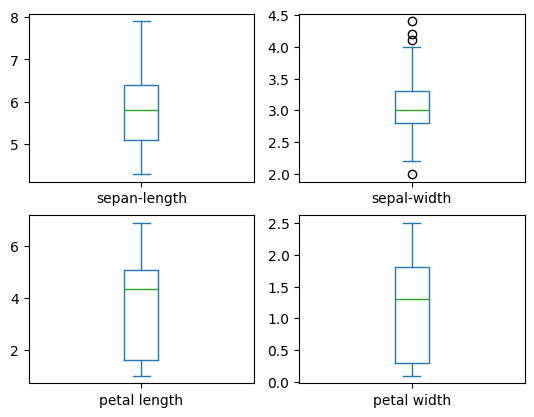

In [8]:
# Univarient PLots - box and whisker plot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

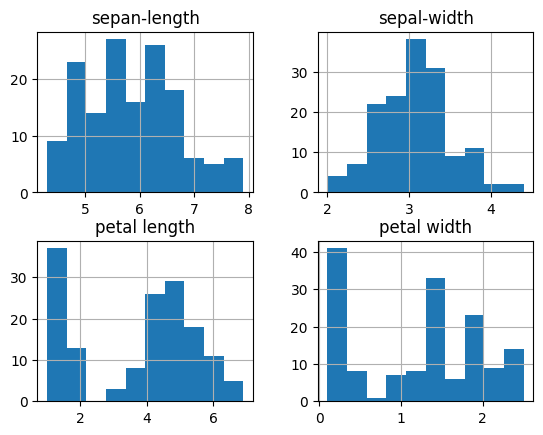

In [9]:
# histogram of the variables
dataset.hist()
pyplot.show()

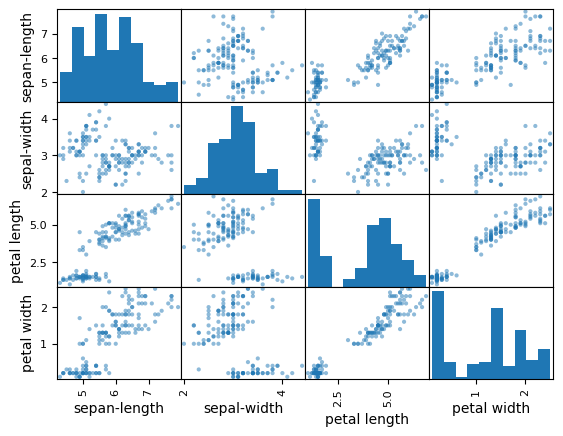

In [10]:
# Multivarient Plots
scatter_matrix(dataset)
pyplot.show()

In [11]:
# Step1. Creating the validation dataset
#split dataset
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X,y,test_size=0.2, random_state=1)

In [12]:
# 1. Logistic Regression
# 2. Linear Discriminant Analysis
# 3. K-Nearest Neighbour
# 4. Classification and Regression Tree
# 5. Gaussian Naive Bayes
# 6. Support Vector Machines

#Building Modles
models = [ ]
models.append(('LR',LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [14]:
#Evaluate
#To ignore warning
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress only specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

# Warinig ignored
results = [ ]
names = [ ]
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


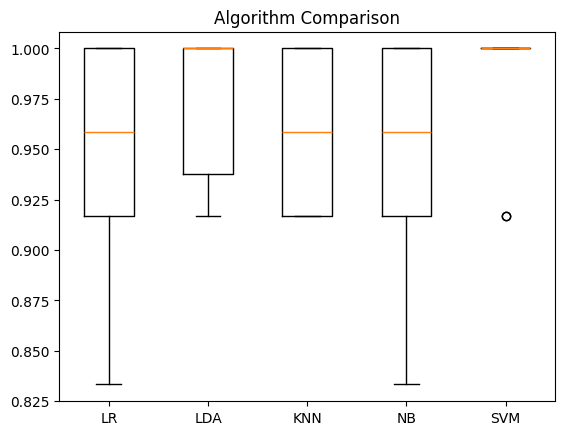

In [15]:
#Compare our models
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [16]:
# Make a prediction on svm
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [17]:
# Evaluate our prediction
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

